# Exploring the Data

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

First, examine the IMDB title basics dataset.

In [169]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [170]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [171]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


IMDB title basics dataset has the data around movie genres with a data size of over 146k.

Next, examine the TMDB movie dataset.

In [172]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [173]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Further research shows that TMDB's popualrity score take into account of the number pf votes, the number of views and the number of users who add it into "Favorite" and "watch list". Hence it's a good indicator movie's popularity. 

I will merge the IMDB title basics with TMDB's datatable in order to have the genres and popularity scores in one dataset. 

In [174]:
genre_popularity = pd.merge(tmdb_movies,title_basics, left_on = 'title',right_on = 'primary_title', how = 'left')

In [175]:
genre_popularity.head()

,Unnamed: 0,genre_ids,id,original_language,original_title_x,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,original_title_y,start_year,runtime_minutes,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010.0,146.0,"Adventure,Fantasy,Mystery"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010.0,98.0,"Action,Adventure,Animation"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"


In [176]:
# Drop the irrelevant columns, only keep the title, genre,popularity, vote_average and release date.
genre_popularity = genre_popularity[['title','genres','popularity','vote_average','release_date']]

In [177]:
genre_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33532 entries, 0 to 33531
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         33532 non-null  object 
 1   genres        23263 non-null  object 
 2   popularity    33532 non-null  float64
 3   vote_average  33532 non-null  float64
 4   release_date  33532 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


In [178]:
# remove the rows that the genres column is null value.
genre_popularity = genre_popularity.dropna(subset = ['genres'])

In [179]:
genre_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23263 entries, 0 to 33531
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         23263 non-null  object 
 1   genres        23263 non-null  object 
 2   popularity    23263 non-null  float64
 3   vote_average  23263 non-null  float64
 4   release_date  23263 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


I also want to add the financial data to the database.

In [180]:
# read the TN datatable.
tn_movie_gross = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [181]:
tn_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [182]:
tn_movie_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [183]:
tn_movie_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Cleaning the data in TN dataset.

In [184]:
#Convert the string data type to numerical for the budget and gross revenue columns.

tn_movie_gross[tn_movie_gross.columns[-3:]] = tn_movie_gross[tn_movie_gross.columns[-3:]].replace('[\$,]','',regex=True).astype(np.int64)

In [185]:
# remove the irrelevant columns
tn_movie_gross=tn_movie_gross.drop(columns = ['id','release_date','domestic_gross'])

Worldwide gross revenue includes both domestic and foreign revenues, hence I will use the worldwide gross for the analysis. 

Add a new column on profit. Further research shows that as a rule of thumb, studios get 50% of the gross revenue with the rest goes to the cinema. Hence I use 50% of the worldwide gross revenue deducted by the production budget calculate the profit.

In [243]:
tn_movie_gross['profit'] = tn_movie_gross['worldwide_gross']*0.5 -tn_movie_gross['production_budget']

In [244]:
tn_movie_gross.head()

,movie,production_budget,worldwide_gross,profit
0,Avatar,425000000,2776345279,963172639.5
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,112231937.5
2,Dark Phoenix,350000000,149762350,-275118825.0
3,Avengers: Age of Ultron,330600000,1403013963,370906981.5
4,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,341360873.5


In [245]:
tn_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5782 non-null   object 
 1   production_budget  5782 non-null   int64  
 2   worldwide_gross    5782 non-null   int64  
 3   profit             5782 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 180.8+ KB


Merge the TN movie_gross with the previous genre_popularity dataset.

In [246]:
# Use inner merge to exclude rows that have NA value.
genre_popularity_rev = pd.merge(genre_popularity,tn_movie_gross,left_on = 'title',right_on = 'movie', how = 'inner').drop(columns=['movie'])

In [247]:
genre_popularity_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4474 entries, 0 to 4473
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4474 non-null   object 
 1   genres             4474 non-null   object 
 2   popularity         4474 non-null   float64
 3   vote_average       4474 non-null   float64
 4   release_date       4474 non-null   object 
 5   production_budget  4474 non-null   int64  
 6   worldwide_gross    4474 non-null   int64  
 7   profit             4474 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 279.8+ KB


Add the studio data into the datatable.

In [248]:
#read the BOM movie datatable.
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [191]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [192]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [193]:
# extract the title and studio columns.
studio = bom_movie_gross[['title','studio']]

In [194]:
studio.head()

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW


In [258]:
# Use inner merger to combine the studio data with the previous genre_popularity_rev dataset.
genre_popularity_rev_studio = pd.merge(genre_popularity_rev,studio,on = 'title',how = 'inner')

In [259]:
genre_popularity_rev_studio.head()

,title,genres,popularity,vote_average,release_date,production_budget,worldwide_gross,profit,studio
0,How to Train Your Dragon,"Action,Adventure,Animation",28.734,7.7,2010-03-26,165000000,494870992,82435496.0,P/DW
1,Iron Man 2,"Action,Adventure,Sci-Fi",28.515,6.8,2010-05-07,170000000,621156389,140578194.5,Par.
2,Inception,"Action,Adventure,Sci-Fi",27.920,8.3,2010-07-16,160000000,835524642,257762321.0,WB
3,Toy Story 3,"Adventure,Animation,Comedy",24.445,7.7,2010-06-17,200000000,1068879522,334439761.0,BV
4,Despicable Me,"Animation,Comedy,Family",23.673,7.2,2010-07-09,69000000,543464573,202732286.5,Uni.


In [260]:
genre_popularity_rev_studio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2057 non-null   object 
 1   genres             2057 non-null   object 
 2   popularity         2057 non-null   float64
 3   vote_average       2057 non-null   float64
 4   release_date       2057 non-null   object 
 5   production_budget  2057 non-null   int64  
 6   worldwide_gross    2057 non-null   int64  
 7   profit             2057 non-null   float64
 8   studio             2057 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 144.8+ KB


In [261]:
genre_popularity_rev_studio['release_year'] = genre_popularity_rev_studio['release_date'].map(lambda x : x[:4]).astype(np.int64)
genre_popularity_rev_studio['release_month'] = genre_popularity_rev_studio['release_date'].map(lambda x : x[5:7]).astype(np.int64)

In [262]:
# Save the dataset.
genre_popularity_rev_studio.to_csv('data/genre_popularity_rev_studio')

In [263]:
genre_popularity_rev_studio.head()

,title,genres,popularity,vote_average,release_date,production_budget,worldwide_gross,profit,studio,release_year,release_month
0,How to Train Your Dragon,"Action,Adventure,Animation",28.734,7.7,2010-03-26,165000000,494870992,82435496.0,P/DW,2010,3
1,Iron Man 2,"Action,Adventure,Sci-Fi",28.515,6.8,2010-05-07,170000000,621156389,140578194.5,Par.,2010,5
2,Inception,"Action,Adventure,Sci-Fi",27.920,8.3,2010-07-16,160000000,835524642,257762321.0,WB,2010,7
3,Toy Story 3,"Adventure,Animation,Comedy",24.445,7.7,2010-06-17,200000000,1068879522,334439761.0,BV,2010,6
4,Despicable Me,"Animation,Comedy,Family",23.673,7.2,2010-07-09,69000000,543464573,202732286.5,Uni.,2010,7


In [257]:
genre_popularity_rev_studio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2057 non-null   object 
 1   genres             2057 non-null   object 
 2   popularity         2057 non-null   float64
 3   vote_average       2057 non-null   float64
 4   release_date       2057 non-null   object 
 5   production_budget  2057 non-null   int64  
 6   worldwide_gross    2057 non-null   int64  
 7   studio             2057 non-null   object 
 8   release_year       2057 non-null   int64  
 9   release_month      2057 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 160.8+ KB


In [209]:
genre_popularity_rev_studio.describe()

,popularity,vote_average,production_budget,worldwide_gross,release_year,release_month
count,2057.000000,2057.000000,2.057000e+03,2.057000e+03,2057.000000,2057.000000
mean,11.712786,6.298396,4.279986e+07,1.388337e+08,2013.536704,7.219251
std,7.969013,1.098674,5.323409e+07,2.226966e+08,4.118826,3.465794
min,0.600000,0.000000,5.000000e+04,0.000000e+00,1968.000000,1.000000
25%,7.530000,5.800000,9.000000e+06,1.430493e+07,2012.000000,4.000000
50%,10.406000,6.300000,2.500000e+07,5.789719e+07,2014.000000,8.000000
75%,14.800000,6.900000,5.000000e+07,1.589053e+08,2016.000000,10.000000
max,80.773000,10.000000,4.106000e+08,2.048134e+09,2018.000000,12.000000


In [210]:
genre_popularity_rev_studio_explode = genre_popularity_rev_studio.copy()

In [211]:
# split the genres into a list
genre_popularity_rev_studio_explode['genres']=genre_popularity_rev_studio['genres'].str.split(pat=',',expand = False)

In [212]:
# explode the genres list into multiple rows
genre_popularity_rev_studio_explode=genre_popularity_rev_studio_explode.explode('genres')

In [213]:
genre_popularity_rev_studio_explode

,title,genres,popularity,vote_average,release_date,production_budget,worldwide_gross,studio,release_year,release_month
0,How to Train Your Dragon,Action,28.734,7.7,2010-03-26,165000000,494870992,P/DW,2010,3
0,How to Train Your Dragon,Adventure,28.734,7.7,2010-03-26,165000000,494870992,P/DW,2010,3
0,How to Train Your Dragon,Animation,28.734,7.7,2010-03-26,165000000,494870992,P/DW,2010,3
1,Iron Man 2,Action,28.515,6.8,2010-05-07,170000000,621156389,Par.,2010,5
1,Iron Man 2,Adventure,28.515,6.8,2010-05-07,170000000,621156389,Par.,2010,5
...,...,...,...,...,...,...,...,...,...,...
2055,Proud Mary,Crime,9.371,5.5,2018-01-12,30000000,21709539,SGem,2018,1
2055,Proud Mary,Drama,9.371,5.5,2018-01-12,30000000,21709539,SGem,2018,1
2056,Bilal: A New Breed of Hero,Action,2.707,6.8,2018-02-02,30000000,648599,VE,2018,2
2056,Bilal: A New Breed of Hero,Adventure,2.707,6.8,2018-02-02,30000000,648599,VE,2018,2


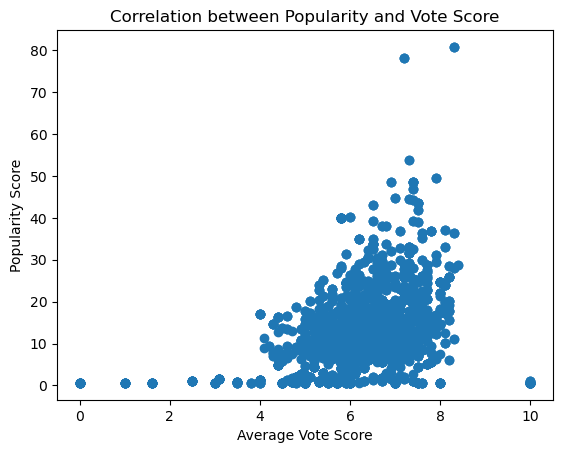

In [215]:
fig, ax=plt.subplots()
x=genre_popularity_rev_studio_explode['vote_average']
y=genre_popularity_rev_studio_explode['popularity']

plt.scatter(x,y)
ax.set_xlabel('Average Vote Score')
ax.set_ylabel('Popularity Score')
ax.set_title('Correlation between Popularity and Vote Score')

plt.show();

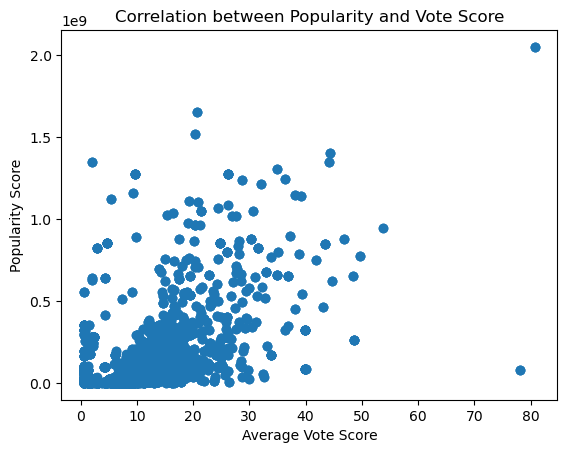

In [217]:
fig, ax=plt.subplots()
x=genre_popularity_rev_studio_explode['popularity']
y=genre_popularity_rev_studio_explode['worldwide_gross']

plt.scatter(x,y)
ax.set_xlabel('Average Vote Score')
ax.set_ylabel('Popularity Score')
ax.set_title('Correlation between Popularity and Vote Score')

plt.show();

In [238]:
genre_popularity_groupby = genre_popularity_rev_studio_explode.groupby(['genres'])[['popularity','worldwide_gross','production_budget']].mean()

In [239]:
genre_popularity_groupby

,popularity,worldwide_gross,production_budget
genres,,,
Action,16.213868,2.451212e+08,8.184542e+07
Adventure,17.760992,3.622733e+08,1.087790e+08
Animation,14.657526,3.871748e+08,9.852241e+07
Biography,11.370641,8.918469e+07,2.855669e+07
Comedy,11.692046,1.453128e+08,4.029319e+07
Crime,12.169525,9.152109e+07,3.241594e+07
Documentary,9.424076,9.958067e+07,3.308213e+07
Drama,10.547793,8.157516e+07,2.786476e+07
Family,12.149625,1.590037e+08,5.676771e+07


In [224]:
release_month = genre_popularity_rev_studio.groupby(['release_month'])['worldwide_gross'].mean()

In [226]:
release_month.sort_values()

release_month
10    7.452787e+07
1     1.027565e+08
3     1.046333e+08
8     1.056291e+08
4     1.179300e+08
9     1.249734e+08
12    1.445807e+08
2     1.633399e+08
6     1.649907e+08
11    1.845617e+08
5     1.854141e+08
7     2.032089e+08
Name: worldwide_gross, dtype: float64

In [230]:
studio_financial_filter = genre_popularity_rev_studio_explode.loc[genre_popularity_rev_studio_explode['release_year']>=2010]

In [232]:
studio_bud = studio_financial_filter.pivot_table(index = ['studio'], columns = 'release_year', values = 'production_budget', aggfunc = 'mean')

In [236]:
studio_bud.dropna()

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
studio,,,,,,,,,
BV,1.341667e+08,1.422700e+08,1.094000e+08,1.393571e+08,9.826667e+07,1.500718e+08,1.491463e+08,1.847500e+08,1.838625e+08
Focus,1.000000e+07,1.568333e+07,3.236364e+07,1.261538e+07,2.061538e+07,1.200000e+07,1.946275e+07,3.000000e+07,2.136364e+07
Fox,6.905952e+07,5.672093e+07,5.421250e+07,8.204444e+07,1.025385e+08,7.452143e+07,7.457143e+07,7.902326e+07,4.869565e+07
FoxS,1.234000e+07,9.289615e+06,4.266667e+06,1.152143e+07,1.202667e+07,1.321739e+07,9.000000e+06,1.346341e+07,1.250000e+07
IFC,5.683333e+06,1.066429e+07,1.558769e+07,4.884615e+06,1.020000e+07,5.444444e+07,1.000000e+07,2.119048e+06,4.000000e+07
LGF,3.582734e+07,2.593250e+07,5.232353e+07,4.432143e+07,6.000000e+07,5.500000e+07,2.066279e+07,2.091667e+07,2.755556e+07
Par.,7.105000e+07,8.593750e+07,2.843750e+07,1.150833e+08,6.620408e+07,1.953571e+07,6.482927e+07,9.706250e+07,4.293750e+07
SGem,3.430556e+07,3.210000e+07,3.985714e+07,4.400000e+07,2.400000e+07,1.925000e+07,1.900000e+07,3.750000e+07,1.400000e+07
Sony,7.121429e+07,6.001613e+07,9.312963e+07,9.045000e+07,8.607143e+07,8.871795e+07,5.093548e+07,6.090000e+07,5.240000e+07


In [237]:
studio_bud.describe()

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,3.800000e+01,3.500000e+01,3.400000e+01,3.200000e+01,3.500000e+01,3.800000e+01,3.600000e+01,2.800000e+01,2.900000e+01
mean,3.158007e+07,3.423332e+07,3.161428e+07,3.727646e+07,2.936551e+07,2.795233e+07,2.918716e+07,3.774719e+07,3.413351e+07
std,3.411244e+07,3.693072e+07,3.559851e+07,3.910997e+07,2.883185e+07,3.162946e+07,3.197593e+07,4.255099e+07,3.601358e+07
min,2.000000e+06,3.035714e+06,2.700000e+05,1.000000e+06,4.000000e+05,5.000000e+05,2.500000e+06,1.700000e+06,1.500000e+06
25%,9.275000e+06,1.050567e+07,6.143182e+06,5.811154e+06,8.230769e+06,6.267857e+06,9.375000e+06,1.007895e+07,1.400000e+07
50%,2.031154e+07,2.000000e+07,2.012500e+07,2.010682e+07,1.800000e+07,1.310870e+07,1.913636e+07,2.596905e+07,2.500000e+07
75%,3.595684e+07,3.915732e+07,4.071429e+07,5.085098e+07,5.125000e+07,4.750242e+07,3.206250e+07,4.912516e+07,4.293750e+07
max,1.449000e+08,1.583333e+08,1.330000e+08,1.393571e+08,1.025385e+08,1.500718e+08,1.491463e+08,1.847500e+08,1.838625e+08


In [106]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [107]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [108]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


IMDB title ratings dataset has the data around average rating and the number of votes for each rating. It has nearly 74k datas.

Another dataset TMDB movie also has the rating data.

In [109]:
tmdb_ratings = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [110]:
tmdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


However, it has only 26k data, much smaller than IMDB's rating dataset. In addition, since both IMDB title basics and IMDB ratings are from IMDB, when merging the data, the instance of mismatch(null value) would be fewer compared with merging datasets from two different sources. Hence, I decide to use IMDB's rating data.

Combine the two datatable - title basics and title ratings to have the rating for each different genres. 

In [111]:
# use "right" merge to avoid the null balues as ratings dataset has fewer data.

title_genres = pd.merge(title_basics,title_ratings, on = ['tconst'], how = 'right')

In [112]:
title_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Combined dataset has ~74k data.

Next, explore the dataset with revenue data.
I looked the BOM movie gross dataset and the TN movei budget dataset.

TN movie gross dataset has data size of 5,782, which is more than the BOM's dataset - 3,387 data. TN data also has the data on the production budget, which can be used to calculate the profit.Hence I decide to use the BOM's dataset.

Join the TN gross revenue dataset with the above genre-rating dataset so I can have the movie title, genres, rating, vote count and gross revenue in one dataframe.

In [119]:
# Use the "inner" join to exclude the movies that do not have the gross revenue data.
# drop the duplicate or irrelevant columns
title_genre_rev_noexplode = pd.merge(title_genres,tn_movie_gross,left_on=['primary_title'],right_on=['movie'], how='inner').drop(columns=['movie','id'])

In [120]:
title_genre_rev_noexplode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   int64  
 8   release_date       2875 non-null   object 
 9   production_budget  2875 non-null   object 
 10  domestic_gross     2875 non-null   object 
 11  worldwide_gross    2875 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 269.7+ KB


In [121]:
# Remove the rows with NA value in the genres column
title_genre_rev_noexplode = title_genre_rev_noexplode.dropna(subset=['genres'])

In [122]:
title_genre_rev_noexplode

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
1,tt1094666,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",7.0,1613,"Mar 21, 2008","$850,000","$442,638","$442,638"
2,tt3096900,The Hammer,The Hammer,2015,75.0,"Action,Adventure,Documentary",6.5,13,"Mar 21, 2008","$850,000","$442,638","$442,638"
3,tt1171222,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5.1,8296,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836"
4,tt1210166,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",7.6,326657,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835"
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt3517850,12 Rounds,12 Rounds,2017,NaN,"Action,Drama,Romance",8.1,11,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
2871,tt3591950,Fantasia,Fantasia,2014,86.0,Drama,5.5,44,"Nov 13, 1940","$2,280,000","$83,320,000","$83,320,000"
2872,tt7201846,Edmond,Edmond,2018,110.0,"Comedy,Drama,History",7.5,705,"Jul 14, 2006","$10,000,000","$131,719","$241,719"
2873,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724,"Jul 20, 2018","$1,500,000",$0,"$98,806"


The dataset has 2867 movies. 

In [124]:
# Remove the irrelevant columns - origibal_title, domestic_gross and runtime.
title_genre_rev_noexplode = title_genre_rev_noexplode.drop(columns = ['original_title','runtime_minutes','domestic_gross'])

In [144]:
title_genre_rev_noexplode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2867 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2867 non-null   object 
 1   primary_title      2867 non-null   object 
 2   start_year         2867 non-null   int64  
 3   genres             2867 non-null   object 
 4   averagerating      2867 non-null   float64
 5   numvotes           2867 non-null   int64  
 6   release_date       2867 non-null   object 
 7   production_budget  2867 non-null   int64  
 8   worldwide_gross    2867 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 224.0+ KB


In [146]:
# Save this dataset for the next step data analysis.
title_genre_rev_noexplode.to_csv('data/title_genre_rev_noexplode')

Create a new dataset that split the genres into multiple rows with each row has one genre. 

In [128]:
title_genre_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2867 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2867 non-null   object 
 1   primary_title      2867 non-null   object 
 2   start_year         2867 non-null   int64  
 3   genres             2867 non-null   object 
 4   averagerating      2867 non-null   float64
 5   numvotes           2867 non-null   int64  
 6   release_date       2867 non-null   object 
 7   production_budget  2867 non-null   int64  
 8   worldwide_gross    2867 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 224.0+ KB


In [130]:
title_genre_rev.head()

,tconst,primary_title,start_year,genres,averagerating,numvotes,release_date,production_budget,worldwide_gross
0,tt1043726,The Legend of Hercules,2014,"[Action, Adventure, Fantasy]",4.2,50352,"Jan 10, 2014",70000000,58953319
1,tt1094666,The Hammer,2010,"[Biography, Drama, Sport]",7.0,1613,"Mar 21, 2008",850000,442638
2,tt3096900,The Hammer,2015,"[Action, Adventure, Documentary]",6.5,13,"Mar 21, 2008",850000,442638
3,tt1171222,Baggage Claim,2013,[Comedy],5.1,8296,"Sep 27, 2013",8500000,22885836
4,tt1210166,Moneyball,2011,"[Biography, Drama, Sport]",7.6,326657,"Sep 23, 2011",50000000,111300835


In [132]:
title_genre_rev.head()

,tconst,primary_title,start_year,genres,averagerating,numvotes,release_date,production_budget,worldwide_gross
0,tt1043726,The Legend of Hercules,2014,Action,4.2,50352,"Jan 10, 2014",70000000,58953319
0,tt1043726,The Legend of Hercules,2014,Adventure,4.2,50352,"Jan 10, 2014",70000000,58953319
0,tt1043726,The Legend of Hercules,2014,Fantasy,4.2,50352,"Jan 10, 2014",70000000,58953319
1,tt1094666,The Hammer,2010,Biography,7.0,1613,"Mar 21, 2008",850000,442638
1,tt1094666,The Hammer,2010,Drama,7.0,1613,"Mar 21, 2008",850000,442638


In [133]:
title_genre_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6444 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6444 non-null   object 
 1   primary_title      6444 non-null   object 
 2   start_year         6444 non-null   int64  
 3   genres             6444 non-null   object 
 4   averagerating      6444 non-null   float64
 5   numvotes           6444 non-null   int64  
 6   release_date       6444 non-null   object 
 7   production_budget  6444 non-null   int64  
 8   worldwide_gross    6444 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 503.4+ KB


The dataframe 'title_genre_rev' will also be used for data analysis in the next stage. 

In [134]:
#Save it into csv file.
title_genre_rev.to_csv('data/title_genre_rev')

Finally, add the studios to the dataset to create a new dataset for analsis in the next step.

There are two datatables that have the studio data.

In [135]:
rt_movie = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')

In [136]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [137]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


RT's datatable has only 494 movies that has the studio info, whereas BOM's datatable has 3382 movies that has the studio info. Hence I will use BOM's datable.

In [140]:
# Merge the studio dataset with the above genre-rating-gross rev dataset. use inner merge to make sure no null value in the dataset.
studio_rev = pd.merge(title_genre_rev_noexplode,studio,left_on=['primary_title'],right_on=['title'],how="inner").drop(columns=['title'])
#genre_rev_studio0 = pd.merge(title_genre_rev0,studio, left_on=['primary_title'],right_on=['title'],how="inner").drop(columns=['title'])

In [141]:
studio_rev.head()

,tconst,primary_title,start_year,genres,averagerating,numvotes,release_date,production_budget,worldwide_gross,studio
0,tt1043726,The Legend of Hercules,2014,"Action,Adventure,Fantasy",4.2,50352,"Jan 10, 2014",70000000,58953319,LG/S
1,tt1171222,Baggage Claim,2013,Comedy,5.1,8296,"Sep 27, 2013",8500000,22885836,FoxS
2,tt1210166,Moneyball,2011,"Biography,Drama,Sport",7.6,326657,"Sep 23, 2011",50000000,111300835,Sony
3,tt1212419,Hereafter,2010,"Drama,Fantasy,Romance",6.5,87288,"Oct 15, 2010",50000000,108660270,WB
4,tt1232829,21 Jump Street,2012,"Action,Comedy,Crime",7.2,477771,"Mar 16, 2012",42000000,202812429,Sony


In [142]:
studio_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1406 non-null   object 
 1   primary_title      1406 non-null   object 
 2   start_year         1406 non-null   int64  
 3   genres             1406 non-null   object 
 4   averagerating      1406 non-null   float64
 5   numvotes           1406 non-null   int64  
 6   release_date       1406 non-null   object 
 7   production_budget  1406 non-null   int64  
 8   worldwide_gross    1406 non-null   int64  
 9   studio             1406 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 110.0+ KB


In [143]:
# Save the studio dataset.
studio_rev.to_csv('data/studio_rev')